# Plot figures from results files

## Import packages and configure plots

In [1]:
from __future__ import division
import numpy as np
import pickle
import matplotlib.pyplot as plt
from fatiando.constants import MEAN_EARTH_RADIUS

In [2]:
%matplotlib inline
plt.rcParams['axes.labelsize'] = 9.0 # fontsize of the x any y labels
plt.rcParams['xtick.labelsize'] = 9.0 # fontsize of the tick labels
plt.rcParams['ytick.labelsize'] = 9.0 # fontsize of the tick labels
plt.rcParams['legend.fontsize'] = 9.0
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.usetex'] = True # use latex for all text handling
plt.rcParams['text.color'] = '3a3a3a'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.edgecolor'] = '3a3a3a'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['ytick.major.size'] = 2

## Speed comparison

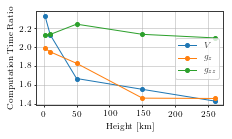

In [3]:
with open('results/speed-comparison/times_homogeneous.pkl', 'r') as outfile:
    times_homogeneous = pickle.load(outfile)

with open('results/speed-comparison/times_variable.pkl', 'r') as outfile:
    times_variable = pickle.load(outfile)

fields = 'potential gz gzz'.split()
fig, ax = plt.subplots()
fig.set_size_inches((3.33, 2))
labels = r'$V$ $g_z$ $g_{zz}$'.split()

for field, label in zip(fields, labels):
    heights = times_homogeneous['heights']
    ratio = times_variable[field]/times_homogeneous[field]
    ax.plot(heights/1000, ratio, 'o-', label=label)
    ax.grid(True, linewidth=0.5, color='#aeaeae')

ax.set_ylabel("Computation Time Ratio")
ax.set_xlabel('Height [km]')    
plt.legend()
plt.tight_layout()
plt.savefig('../figs/speed-comparison.svg')
plt.show()

## Tesseroid vs Spherical Shell with Linear Density

### Thin Shell (1km)

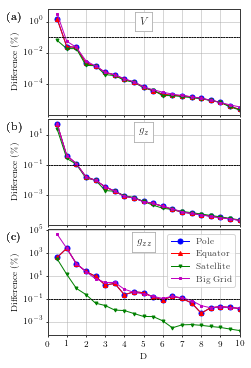

In [4]:
grids = ['pole', 'equator', '260km', '30deg']
fields = 'potential gz gzz'.split()
styles = ['-o', '-^', '-v', '-s']
msize = [5, 4, 3, 2]
colors = ['b', 'r', 'g', 'm']
labels = [r'Pole', r'Equator', r'Satellite', r'Big Grid']
titles = '$V$ $g_z$ $g_{zz}$'.split()
subfigure = '(a) (b) (c)'.split()

fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)
for ax, field, title, sub in zip(axes, fields, titles, subfigure):
    for grid, style, c, label, ms in zip(grids, styles, colors, labels, msize):
        diffs = np.load('results/Dlinear/' + field + '-' + grid + '-differences.npz')
        D_values, diff = diffs['D_values'], diffs['diffs']
        ax.plot(D_values, diff, style, markersize=ms,
                color=c, label=label)
        ax.text(-0.21, 0.9, sub, fontsize=12,
                fontdict={'weight': 'bold'},
                transform=ax.transAxes)
        ax.text(0.5, 0.88, title, fontsize=11,
                horizontalalignment='center',
                verticalalignment='center',
                bbox={'facecolor': 'w',
                      'edgecolor': '#9b9b9b',
                      'linewidth': 0.5, 'pad': 5},
                transform=ax.transAxes)
        ax.plot([0, 10], [1e-1, 1e-1], '--',
                color='k', linewidth=0.5)
        ax.set_yscale('log')
        ax.set_yticks(ax.get_yticks()[2:-2])
        ax.set_ylabel('Difference (\%)')
        ax.grid(True, linewidth=0.5, color='#aeaeae')
        ax.set_axisbelow(True)
ax = axes[-1]
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
ax.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../figs/Dlinear-thin-differences.svg')
plt.show()

### Thick Shell (35km)

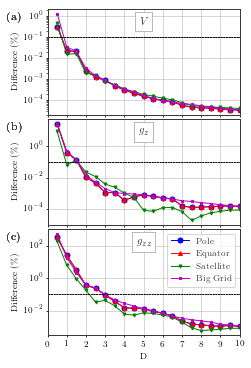

In [5]:
grids = ['pole', 'equator', '260km', '30deg']
fields = 'potential gz gzz'.split()
styles = ['-o', '-^', '-v', '-s']
msize = [5, 4, 3, 2]
colors = ['b', 'r', 'g', 'm']
labels = [r'Pole', r'Equator', r'Satellite', r'Big Grid']
titles = '$V$ $g_z$ $g_{zz}$'.split()
subfigure = '(a) (b) (c)'.split()

fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)
for ax, field, title, sub in zip(axes, fields, titles, subfigure):
    for grid, style, c, label, ms in zip(grids, styles, colors, labels, msize):
        diffs = np.load('results/Dlinear/' + field + '-' + grid + '-thick-differences.npz')
        D_values, diff = diffs['D_values'], diffs['diffs']
        ax.plot(D_values, diff, style, markersize=ms,
                color=c, label=label)
        ax.text(-0.21, 0.9, sub, fontsize=12,
                fontdict={'weight': 'bold'},
                transform=ax.transAxes)
        ax.text(0.5, 0.88, title, fontsize=11,
                horizontalalignment='center',
                verticalalignment='center',
                bbox={'facecolor': 'w',
                      'edgecolor': '#9b9b9b',
                      'linewidth': 0.5, 'pad': 5},
                transform=ax.transAxes)
        ax.plot([0, 10], [1e-1, 1e-1], '--',
                color='k', linewidth=0.5)
        ax.set_yscale('log')
        ax.set_yticks(ax.get_yticks()[2:-2])
        ax.set_ylabel('Difference (\%)')
        ax.grid(True, linewidth=0.5, color='#aeaeae')
        ax.set_axisbelow(True)
ax = axes[-1]
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
ax.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../figs/Dlinear-thick-differences.svg')
plt.show()

### Variation of D with height

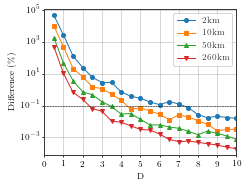

In [6]:
zs = [2e3, 10e3, 50e3, 260e3]
markers = ["o", "s", "^", "v", "D", "p"]
field = 'gzz'

fig, ax = plt.subplots()
fig.set_size_inches((3.33, 2.5))
for z, m in zip(zs, markers):
    diffs = np.load('results/D-vs-height/' + field + '-' +
                    '{:.0f}'.format(z/1e3) + '-differences.npz')
    D_values, diff = diffs['D_values'], diffs['diffs']
    ax.plot(D_values, diff, '-', marker=m,
            label='{:.0f}'.format(z/1e3) + 'km')

ax.plot([0, 10], [1e-1, 1e-1], '--', color='k', linewidth=0.5)
ax.set_yscale('log')
ax.set_yticks(ax.get_yticks()[2:-2])
ax.set_ylabel('Difference (\%)')
ax.grid(True, linewidth=0.5, color='#aeaeae')
ax.set_axisbelow(True)
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
plt.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../figs/D-vs-height-differences.svg')
plt.show()

### Variation of D with slope

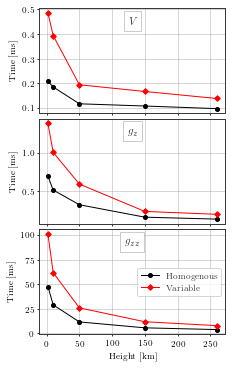

In [7]:
fields = 'potential gz gzz'.split()
fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 6))
fig.subplots_adjust(hspace=0.05)
titles = r'$V$ $g_z$ $g_{zz}$'.split()

with open('results/speed-comparison/times_homogeneous.pkl', 'r') as outfile:
    times_homogeneous = pickle.load(outfile)
    
with open('results/speed-comparison/times_variable.pkl', 'r') as outfile:
    times_variable = pickle.load(outfile)


for field, ax, title in zip(fields, axes, titles):
    ax.plot(heights/1000, 1000*np.array(times_homogeneous[field]), 
            'o-', color='k', marker='o', label="Homogenous")
    ax.plot(heights/1000, 1000*np.array(times_variable[field]), 
            'o-', color='r', marker='D', label="Variable")
    ax.set_ylabel("Time [ms]")
    ax.text(0.5, 0.88, title, fontsize=11,
            horizontalalignment='center',
            verticalalignment='center',
            bbox={'facecolor': 'w',
                  'edgecolor': '#9b9b9b',
                  'linewidth': 0.5, 'pad': 5},
            transform=ax.transAxes)
    ax.grid(True, linewidth=0.5, color='#aeaeae')

plt.legend(loc=5)
plt.xlabel('Height [km]')
plt.show()

## Tesseroid vs Spherical Shell with Exponential Density

### Thin Shell (1km)

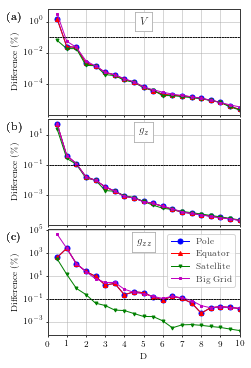

In [8]:
grids = ['pole', 'equator', '260km', '30deg']
fields = 'potential gz gzz'.split()
styles = ['-o', '-^', '-v', '-s']
msize = [5, 4, 3, 2]
colors = ['b', 'r', 'g', 'm']
labels = [r'Pole', r'Equator', r'Satellite', r'Big Grid']
titles = '$V$ $g_z$ $g_{zz}$'.split()
subfigure = '(a) (b) (c)'.split()

fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)
for ax, field, title, sub in zip(axes, fields, titles, subfigure):
    for grid, style, c, label, ms in zip(grids, styles, colors, labels, msize):
        diffs = np.load('results/Dexp-shifted/' + field + '-' + grid + '-differences.npz')
        D_values, diff = diffs['D_values'], diffs['diffs']
        ax.plot(D_values, diff, style, markersize=ms,
                color=c, label=label)
        ax.text(-0.21, 0.9, sub, fontsize=12,
                fontdict={'weight': 'bold'},
                transform=ax.transAxes)
        ax.text(0.5, 0.88, title, fontsize=11,
                horizontalalignment='center',
                verticalalignment='center',
                bbox={'facecolor': 'w',
                      'edgecolor': '#9b9b9b',
                      'linewidth': 0.5, 'pad': 5},
                transform=ax.transAxes)
        ax.plot([-1, 11], [1e-1, 1e-1], '--',
                color='k', linewidth=0.5)
        ax.set_yscale('log')
        ax.set_yticks(ax.get_yticks()[2:-2])
        ax.set_ylabel('Difference (\%)')
        ax.grid(True, linewidth=0.5, color='#aeaeae')
        ax.set_axisbelow(True)
ax = axes[-1]
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
ax.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../figs/Dexp-shifted-thin-differences.svg')
plt.show()

### Thick Shell (35km)

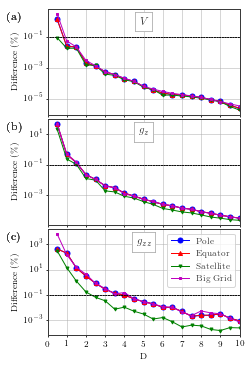

In [9]:
grids = ['pole', 'equator', '260km', '30deg']
fields = 'potential gz gzz'.split()
styles = ['-o', '-^', '-v', '-s']
msize = [5, 4, 3, 2]
colors = ['b', 'r', 'g', 'm']
labels = [r'Pole', r'Equator', r'Satellite', r'Big Grid']
titles = '$V$ $g_z$ $g_{zz}$'.split()
subfigure = '(a) (b) (c)'.split()

fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)
for ax, field, title, sub in zip(axes, fields, titles, subfigure):
    for grid, style, c, label, ms in zip(grids, styles, colors, labels, msize):
        diffs = np.load('results/Dexp-shifted/' + field + '-' + grid + '-thick-differences.npz')
        D_values, diff = diffs['D_values'], diffs['diffs']
        ax.plot(D_values, diff, style, markersize=ms,
                color=c, label=label)
        ax.text(-0.21, 0.9, sub, fontsize=12,
                fontdict={'weight': 'bold'},
                transform=ax.transAxes)
        ax.text(0.5, 0.88, title, fontsize=11,
                horizontalalignment='center',
                verticalalignment='center',
                bbox={'facecolor': 'w',
                      'edgecolor': '#9b9b9b',
                      'linewidth': 0.5, 'pad': 5},
                transform=ax.transAxes)
        ax.plot([-1, 11], [1e-1, 1e-1], '--',
                color='k', linewidth=0.5)
        ax.set_yscale('log')
        ax.set_yticks(ax.get_yticks()[2:-2])
        ax.set_ylabel('Difference (\%)')
        ax.grid(True, linewidth=0.5, color='#aeaeae')
        ax.set_axisbelow(True)
ax = axes[-1]
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
ax.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../figs/Dexp-shifted-thick-differences.svg')
plt.show()

### D vs the constant b in the power

#### Thin Shell

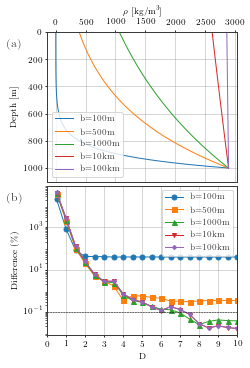

In [10]:
b_values = [1e2, 5*1e2, 1e3, 1e4, 1e5]
markers = ["o", "s", "^", "v", "D"]
msize = [5, 5, 5, 4, 3, 2]
labels = [r"b=100m", r"b=500m",
          r"b=1000m", r"b=10km",
          r"b=100km"]
field = 'gzz'
deltah = MEAN_EARTH_RADIUS
bottom = -1000.
max_density = 2900.
heights = np.linspace(-1000, 0, 101)


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches((3.33, 5))

for b, m, ms, label in zip(b_values, markers, msize, labels):    
    
    def density_exp_shifted(height):
        a = max_density*np.exp(bottom/b)
        r = height + MEAN_EARTH_RADIUS
        return a*np.exp(-(r - deltah)/b)

    ax1.plot(density_exp_shifted(heights), -heights,
             '-', label=label)
    
    diffs = np.load('results/Dexp-vs-power/' + field + '-' +
                    '{:.1e}'.format(b) + '-differences.npz')
    D_values, diff = diffs['D_values'], diffs['diffs']
    ax2.plot(D_values, diff, '-', marker=m,
            markersize=ms, label=label)

ax1.legend()
ax1.grid(True, linewidth=0.5, color='#aeaeae')
ax1.set_xlabel(r"$\rho$ [kg/m$^3$]")
ax1.set_ylabel("Depth [m]")
ax1.set_ylim(0, 1100)
ax1.invert_yaxis()
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(-0.21, 0.9, "(a)", fontsize=12,
         fontdict={'weight': 'bold'},
         transform=ax1.transAxes)

ax2.plot([0, 10], [1e-1, 1e-1], '--', color='k', linewidth=0.5)
ax2.set_yscale('log')
ax2.set_yticks(ax2.get_yticks()[2:-2])
ax2.set_ylabel('Difference (\%)')
ax2.grid(True, linewidth=0.5, color='#aeaeae')
ax2.set_axisbelow(True)
ax2.set_xlabel(r"D")
ax2.set_xlim(0, 10)
ax2.set_xticks(np.arange(0, 11, 1))
ax2.legend(loc=1)
ax2.text(-0.21, 0.9, "(b)", fontsize=12,
         fontdict={'weight': 'bold'},
         transform=ax2.transAxes)

plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../figs/Dexp-power-differences-thin.svg')
plt.show()

#### Thick Shell

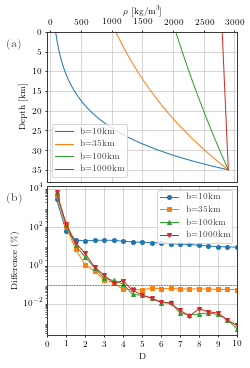

In [11]:
b_values = [1e4, 35e3, 1e5, 1e6]
markers = ["o", "s", "^", "v", "D", "8"]
msize = [4,4, 4,4]
labels = [r"b=10km", r"b=35km",
          r"b=100km", r"b=1000km"]
field = 'gzz'
deltah = MEAN_EARTH_RADIUS
bottom = -35000.
max_density = 2900.
heights = np.linspace(-35000, 0, 101)


fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches((3.33, 5))

for b, m, ms, label in zip(b_values, markers, msize, labels):    
    
    def density_exp_shifted(height):
        a = max_density*np.exp(bottom/b)
        r = height + MEAN_EARTH_RADIUS
        return a*np.exp(-(r - deltah)/b)

    ax1.plot(density_exp_shifted(heights), -heights/1000.,
             '-', label=label)
    
    diffs = np.load('results/Dexp-vs-power/' + field + '-' +
                    '{:.1e}'.format(b) + '-thick-differences.npz')
    D_values, diff = diffs['D_values'], diffs['diffs']
    ax2.plot(D_values, diff, '-', marker=m,
            markersize=ms, label=label)

ax1.legend()
ax1.grid(True, linewidth=0.5, color='#aeaeae')
ax1.set_xlabel(r"$\rho$ [kg/m$^3$]")
ax1.set_ylabel("Depth [km]")
ax1.set_ylim(0, 38)
ax1.invert_yaxis()
ax1.xaxis.tick_top()
ax1.xaxis.set_label_position('top')
ax1.text(-0.21, 0.9, "(a)", fontsize=12,
         fontdict={'weight': 'bold'},
         transform=ax1.transAxes)

ax2.plot([0, 10], [1e-1, 1e-1], '--', color='k', linewidth=0.5)
ax2.set_yscale('log')
ax2.set_yticks(ax2.get_yticks()[2:-2])
ax2.set_ylabel('Difference (\%)')
ax2.grid(True, linewidth=0.5, color='#aeaeae')
ax2.set_axisbelow(True)
ax2.set_xlabel(r"D")
ax2.set_xlim(0, 10)
ax2.set_xticks(np.arange(0, 11, 1))
ax2.legend(loc=1)
ax2.text(-0.21, 0.9, "(b)", fontsize=12,
         fontdict={'weight': 'bold'},
         transform=ax2.transAxes)

plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../figs/Dexp-power-differences-thick.svg')
plt.show()

## Tesseroid with discontinuous density

### Symmetrical density function

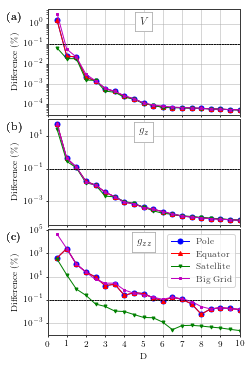

In [12]:
grids = ['pole', 'equator', '260km', '30deg']
fields = 'potential gz gzz'.split()
styles = ['-o', '-^', '-v', '-s']
msize = [5, 4, 3, 2]
colors = ['b', 'r', 'g', 'm']
labels = [r'Pole', r'Equator', r'Satellite', r'Big Grid']
titles = '$V$ $g_z$ $g_{zz}$'.split()
subfigure = '(a) (b) (c)'.split()

fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)
for ax, field, title, sub in zip(axes, fields, titles, subfigure):
    for grid, style, c, label, ms in zip(grids, styles, colors, labels, msize):
        diffs = np.load('results/Ddiscontinuous/' + field + '-' + grid + '-differences.npz')
        D_values, diff = diffs['D_values'], diffs['diffs']
        ax.plot(D_values, diff, style, markersize=ms,
                color=c, label=label)
        ax.text(-0.21, 0.9, sub, fontsize=12,
                fontdict={'weight': 'bold'},
                transform=ax.transAxes)
        ax.text(0.5, 0.88, title, fontsize=11,
                horizontalalignment='center',
                verticalalignment='center',
                bbox={'facecolor': 'w',
                      'edgecolor': '#9b9b9b',
                      'linewidth': 0.5, 'pad': 5},
                transform=ax.transAxes)
        ax.plot([-1, 11], [1e-1, 1e-1], '--',
                color='k', linewidth=0.5)
        ax.set_yscale('log')
        ax.set_yticks(ax.get_yticks()[2:-2])
        ax.set_ylabel('Difference (\%)')
        ax.grid(True, linewidth=0.5, color='#aeaeae')
        ax.set_axisbelow(True)
ax = axes[-1]
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
ax.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../figs/Ddiscontinuous-symmetric-differences.svg')
plt.show()

### Asymmetrical density function

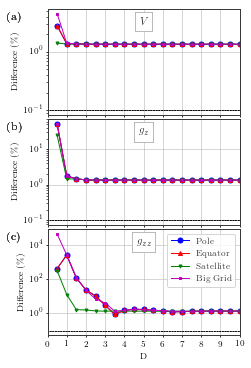

In [13]:
grids = ['pole', 'equator', '260km', '30deg']
fields = 'potential gz gzz'.split()
styles = ['-o', '-^', '-v', '-s']
msize = [5, 4, 3, 2]
colors = ['b', 'r', 'g', 'm']
labels = [r'Pole', r'Equator', r'Satellite', r'Big Grid']
titles = '$V$ $g_z$ $g_{zz}$'.split()
subfigure = '(a) (b) (c)'.split()

fig, axes = plt.subplots(nrows=len(fields), ncols=1, sharex=True)
fig.set_size_inches((3.33, 5))
fig.subplots_adjust(hspace=0)
for ax, field, title, sub in zip(axes, fields, titles, subfigure):
    for grid, style, c, label, ms in zip(grids, styles, colors, labels, msize):
        diffs = np.load('results/Ddiscontinuous/' + field + '-' + grid + '-asym-differences.npz')
        D_values, diff = diffs['D_values'], diffs['diffs']
        ax.plot(D_values, diff, style, markersize=ms,
                color=c, label=label)
        ax.text(-0.21, 0.9, sub, fontsize=12,
                fontdict={'weight': 'bold'},
                transform=ax.transAxes)
        ax.text(0.5, 0.88, title, fontsize=11,
                horizontalalignment='center',
                verticalalignment='center',
                bbox={'facecolor': 'w',
                      'edgecolor': '#9b9b9b',
                      'linewidth': 0.5, 'pad': 5},
                transform=ax.transAxes)
        ax.plot([-1, 11], [1e-1, 1e-1], '--',
                color='k', linewidth=0.5)
        ax.set_yscale('log')
        ax.set_yticks(ax.get_yticks()[2:-2])
        ax.set_ylabel('Difference (\%)')
        ax.grid(True, linewidth=0.5, color='#aeaeae')
        ax.set_axisbelow(True)
ax = axes[-1]
ax.set_xlabel(r"D")
ax.set_xlim(0, 10)
ax.set_xticks(np.arange(0, 11, 1))
ax.legend()
plt.tight_layout(pad=0.3, h_pad=0, w_pad=0)
plt.savefig('../figs/Ddiscontinuous-asymmetric-differences.svg')
plt.show()